In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2,glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense ,Conv2D ,MaxPool2D, Dropout ,Flatten
from keras.models import Sequential
from keras.preprocessing import image


In [ ]:
class_names = {'COVID19','NORMAL'}
IMG_SIZE = 224

In [ ]:
def get_data_from_folder(path):
  data=[]
  for class_name in class_names:
    try:
      files=glob.glob(path+"/"+class_name+"/")
      for f in files:
        img = cv2.imread(f)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append([np.array(img),class_names.index(class_name)])
    except:
      pass
    np.random.shuffle(data)
    return data

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/covidimage/Data/train"


In [ ]:
os.listdir(DATASET_DIR)

['covid', 'normal']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(224,224)
batch_size=32
train_ds= image_dataset_from_directory(
    "/content/drive/MyDrive/covidimage/Data/train",
    labels ="inferred",
    label_mode= 'int',
    validation_split=0.2,
    subset="training",
    seed =1337,
    image_size=image_size,
    batch_size=batch_size,
    )
val_ds= image_dataset_from_directory(
    "/content/drive/MyDrive/covidimage/Data/train",
    labels="inferred",
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    seed =1337,
    image_size=image_size,
    batch_size=batch_size,
    )



Found 1726 files belonging to 2 classes.
Using 1381 files for training.
Found 1726 files belonging to 2 classes.
Using 345 files for validation.


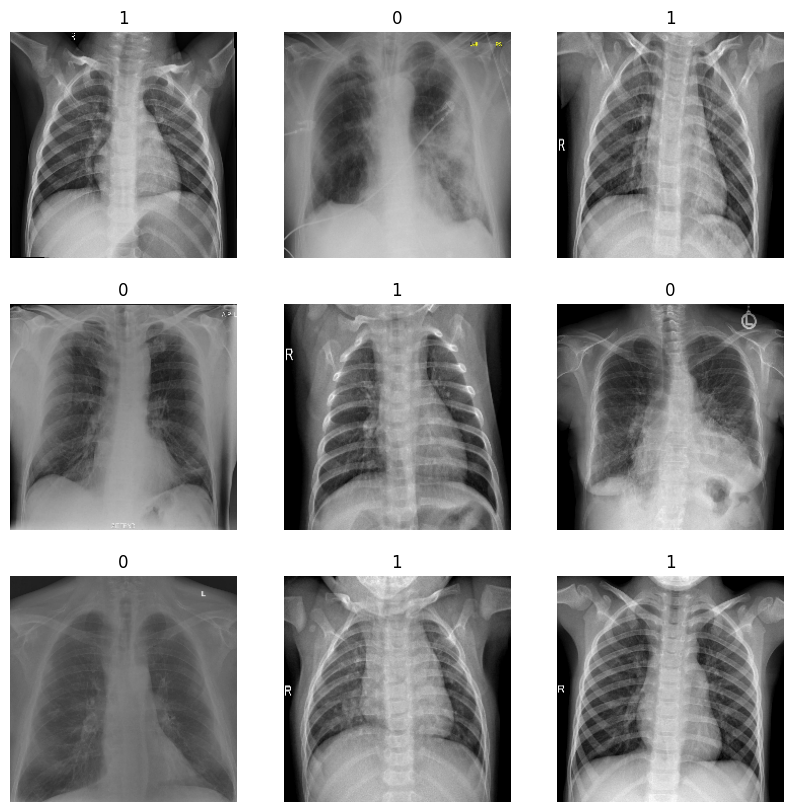

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

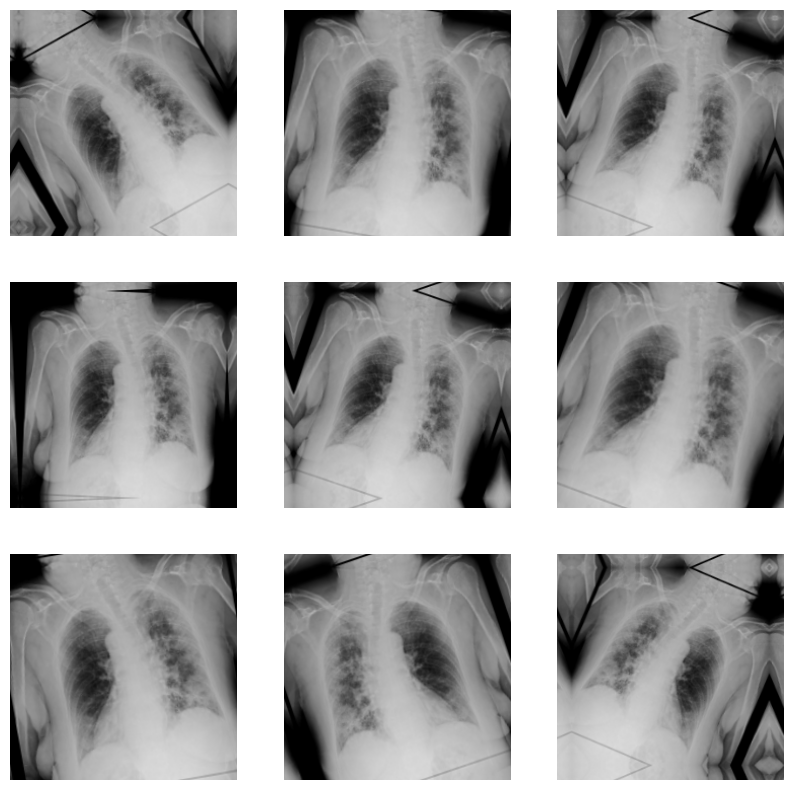

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
data_augmentation = tf.keras.Sequential(
    [
         tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
         tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
         tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")



In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 1209 images belonging to 2 classes.
Found 517 images belonging to 2 classes.


<ipython-input-16-3bf030a1d38a>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/48
201/201 [==============================] - 440s 2s/step - loss: 0.6193 - accuracy: 0.7340 - val_loss: 0.5663 - val_accuracy: 0.7326
Epoch 2/48
201/201 [==============================] - 162s 805ms/step - loss: 0.4698 - accuracy: 0.7905 - val_loss: 0.3076 - val_accuracy: 0.9012
Epoch 3/48
201/201 [==============================] - 167s 832ms/step - loss: 0.2998 - accuracy: 0.8994 - val_loss: 0.2549 - val_accuracy: 0.9109
Epoch 4/48
201/201 [==============================] - 166s 828ms/step - loss: 0.2483 - accuracy: 0.9210 - val_loss: 0.1773 - val_accuracy: 0.9167
Epoch 5/48
201/201 [==============================] - 183s 912ms/step - loss: 0.2438 - accuracy: 0.9235 - val_loss: 0.8863 - val_accuracy: 0.4380
Epoch 6/48
201/201 [==============================] - 171s 849ms/step - loss: 0.1781 - accuracy: 0.9410 - val_loss: 0.0878 - val_accuracy: 0.9709
Epoch 7/48
201/201 [==============================] - 173s 861ms/step - loss: 0.1675 - accuracy: 0.9576 - val_loss: 0.1446 - va

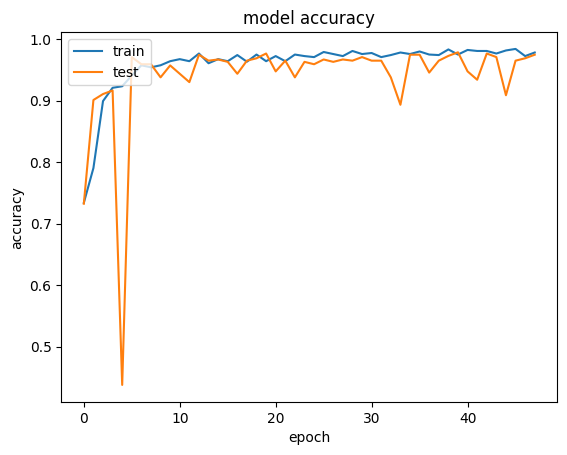

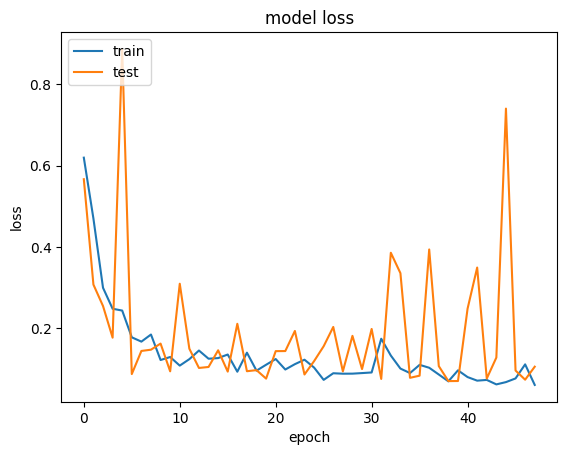

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.get_weights()

[array([[[[ 1.43356934e-01, -1.33542389e-01, -7.04980567e-02,
           -6.49787439e-03,  2.61073392e-02, -8.03360119e-02,
           -6.55672513e-03,  5.90101108e-02, -1.41728461e-01,
           -1.15887783e-01, -1.12063093e-02, -1.27404332e-01,
           -9.45443958e-02,  4.49692719e-02, -7.14382902e-03,
            1.51314676e-01, -9.86052379e-02,  1.22787200e-01,
            1.23608783e-01, -8.97488296e-02, -1.01748355e-01,
           -9.98927727e-02, -1.41236141e-01,  8.07003770e-03,
           -1.20887391e-01, -6.76481426e-02,  1.01094708e-01,
           -1.27079800e-01,  4.30079475e-02, -6.05842732e-02,
           -1.90764263e-01,  6.43472448e-02],
          [-6.71521872e-02, -7.11021200e-02,  1.72289684e-02,
            9.54650864e-02, -7.20055699e-02,  1.04588769e-01,
            2.59547438e-02,  4.03153524e-03,  1.80365313e-02,
            4.69121225e-02, -4.82711084e-02, -4.30708155e-02,
           -1.33782327e-01, -3.72871757e-02,  8.09349641e-02,
            1.49008825e-

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9783873558044434
validation_accuracy 0.9748061895370483


In [ ]:
label = validation_generator.classes

In [ ]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

87/87 [==============================] - 27s 301ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[138, 379],
       [  0,   0]])

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)


Predicted,0,All
Actual,,
0,138,138
1,379,379
All,517,517


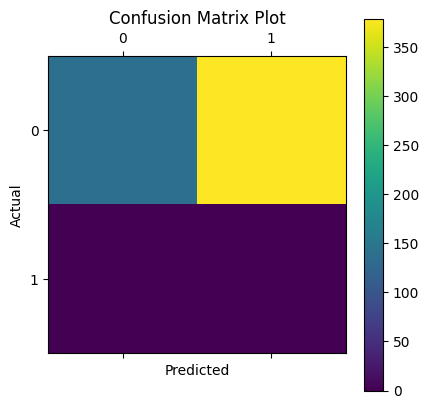

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();